# Coding Exercise Part 2: Exploring Overfitting and Underfitting

### Objective:
Implement a simple linear regression model using PyTorch and evaluate its performance in terms of underfitting and overfitting.

### 1. Generating a Synthetic Dataset
We'll first generate a dataset that follows a linear relationship with some added noise.

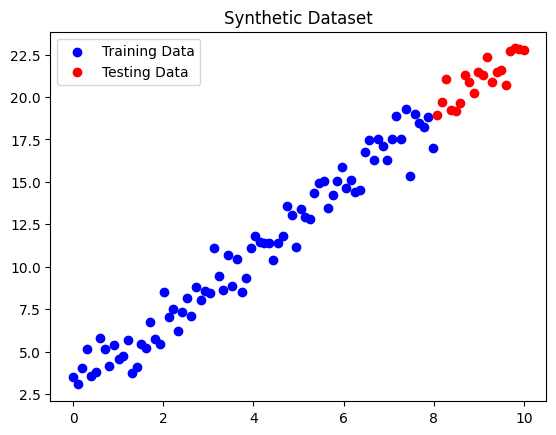

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)  # for reproducibility
x = np.linspace(0, 10, 100)
y = 2 * x + 3 + np.random.normal(0, 1, 100)

# Split the dataset into training (80%) and testing (20%)
split_idx = int(0.8 * len(x))
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Plot the data
plt.scatter(x_train, y_train, label='Training Data', color='blue')
plt.scatter(x_test, y_test, label='Testing Data', color='red')
plt.legend()
plt.title("Synthetic Dataset")
plt.show()

### 2. Implementing Linear Regression in PyTorch
We'll create a simple linear regression model using PyTorch.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
# print(x_train_tensor)
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).view(-1, 1)
# print(x_train_tensor)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
x_test_tensor  = torch.tensor(x_test, dtype=torch.float32).view(-1, 1)
y_test_tensor  = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Initialize weight and bias
weight = torch.randn(1, requires_grad=True)
# print(weight)
bias   = torch.randn(1, requires_grad=True)

def linear_regression(x):
    return x * weight + bias

tensor([0.0000, 0.1010, 0.2020, 0.3030, 0.4040, 0.5051, 0.6061, 0.7071, 0.8081,
        0.9091, 1.0101, 1.1111, 1.2121, 1.3131, 1.4141, 1.5152, 1.6162, 1.7172,
        1.8182, 1.9192, 2.0202, 2.1212, 2.2222, 2.3232, 2.4242, 2.5253, 2.6263,
        2.7273, 2.8283, 2.9293, 3.0303, 3.1313, 3.2323, 3.3333, 3.4343, 3.5354,
        3.6364, 3.7374, 3.8384, 3.9394, 4.0404, 4.1414, 4.2424, 4.3434, 4.4444,
        4.5455, 4.6465, 4.7475, 4.8485, 4.9495, 5.0505, 5.1515, 5.2525, 5.3535,
        5.4545, 5.5556, 5.6566, 5.7576, 5.8586, 5.9596, 6.0606, 6.1616, 6.2626,
        6.3636, 6.4646, 6.5657, 6.6667, 6.7677, 6.8687, 6.9697, 7.0707, 7.1717,
        7.2727, 7.3737, 7.4747, 7.5758, 7.6768, 7.7778, 7.8788, 7.9798])


### 3. Training the Model
We'll train the model using Mean Squared Error (MSE) as the loss function.

In [ ]:
# Training parameters
learning_rate = 0.01
epochs        = 100

# Training loop
for epoch in range(epochs):
    # Forward pass
    outputs = linear_regression(x_train_tensor)
    loss    = torch.mean((outputs - y_train_tensor) ** 2)

    # Backward pass and optimization
    loss.backward()

    # Update weights and bias
    with torch.no_grad():
        weight -= learning_rate * weight.grad
        bias   -= learning_rate * bias.grad

        # Zero the gradients
        weight.grad.zero_()
        bias.grad.zero_()

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [20/100], Loss: 1.7290
Epoch [40/100], Loss: 1.5814
Epoch [60/100], Loss: 1.4602
Epoch [80/100], Loss: 1.3607
Epoch [100/100], Loss: 1.2790


### 4. Evaluating the Model
We'll evaluate the model's performance on both the training and testing data.

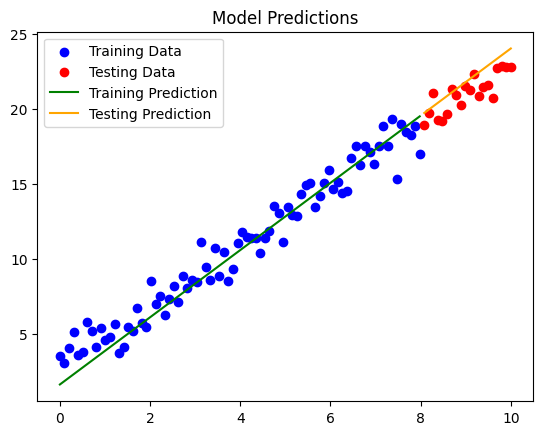

In [ ]:
# Predictions
train_pred = linear_regression(x_train_tensor).detach().numpy()
test_pred  = linear_regression(x_test_tensor).detach().numpy()

# Plotting
plt.scatter(x_train, y_train, label='Training Data', color='blue')
plt.scatter(x_test, y_test, label='Testing Data', color='red')
plt.plot(x_train, train_pred, label='Training Prediction', color='green')
plt.plot(x_test, test_pred, label='Testing Prediction', color='orange')
plt.legend()
plt.title("Model Predictions")
plt.show()

### 5. Simulating Overfitting and Underfitting

**Overfitting:**

To simulate overfitting, we can:

1. Reduce the size of the training data.
2. Increase the complexity of the model (e.g. more params).
3. Train for more epochs.

**Underfitting:**

To simulate underfitting, we can:

1. Use a very simple model (e.g., without bias).
2. Reduce the number of epochs.
3. Use insufficient features.

For the sake of this exercise, you can experiment with the above suggestions by modifying the training data size, model complexity, or training parameters and observe the results.

